# librerias

In [1]:
!pip install imblearn

You should consider upgrading via the 'c:\users\milton\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
from __future__ import absolute_import,division,print_function,unicode_literals
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import cv2
from glob import glob
import sklearn
import skimage
from skimage.transform import resize
import random
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from skimage.color import rgb2gray
import datetime

# importamos el dataset

In [3]:
train_dir="chest_xray/train/"
test_dir="chest_xray/test/"

In [4]:
LOAD_FROM_IMAGES=False
#funcion para obtener imagenes
def get_data(folder):
    x=[]
    y=[]
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ["NORMAL"]:
                label=0
            elif folderName in ["PNEUMONIA"]:
                label=1
            else:
                label=2
            for image_filename in tqdm(os.listdir(folder+folderName)):
                img_file=cv2.imread(folder+folderName+"/"+image_filename)
                if img_file is not None:
                    img_file=skimage.transform.resize(img_file,(150,150,3),mode="constant",anti_aliasing=True)
                    #convierto a blanco y negro
                    img_file=rgb2gray(img_file)
                    img_arr=np.array(img_file )
                    x.append(img_arr)
                    y.append(label)
    x=np.asarray(x)
    y=np.asarray(y)
    return x,y
if LOAD_FROM_IMAGES:
    #obtenmos las imagenes en arrays para entrenar
    x_train,y_train=get_data(train_dir)
    x_test,y_test=get_data(test_dir)
    #guardamos los array en archivos
    np.save("xtrain.npy",x_train)
    np.save("ytrain.npy",y_train)
    np.save("xtest.npy",x_test)
    np.save("ytest.npy",y_test)
else:
    #cargamos los arrays
    x_train=np.load("xtrain.npy")
    y_train=np.load("ytrain.npy")
    x_test=np.load("xtest.npy")
    y_test=np.load("ytest.npy")

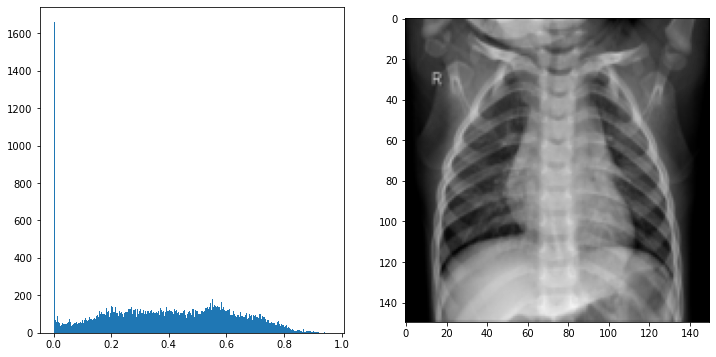

In [5]:
#mostrar un histograma de una radiografia
def plotHistogram(a):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.hist(a.ravel(),bins=255)
    plt.subplot(1,2,2)
    plt.imshow(a,cmap="gray",vmin=0,vmax=1)
    plt.show()
plotHistogram(x_train[1])
    

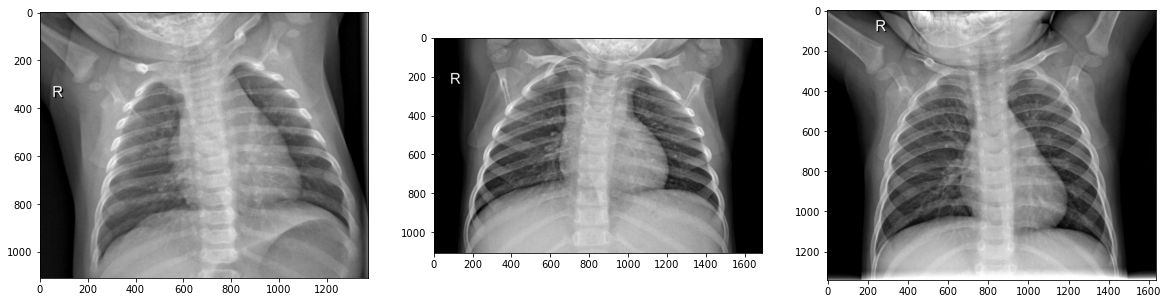

In [6]:
#pacientes normales
normales=glob("chest_xray/train/NORMAL/**")
def plotThreeNormalImages(images):
    r=random.sample(images,3)
    plt.figure(figsize=(20,20))
    plt.subplot(1,3,1)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(1,3,2)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(1,3,3)
    plt.imshow(cv2.imread(r[2]))
plotThreeNormalImages(normales)

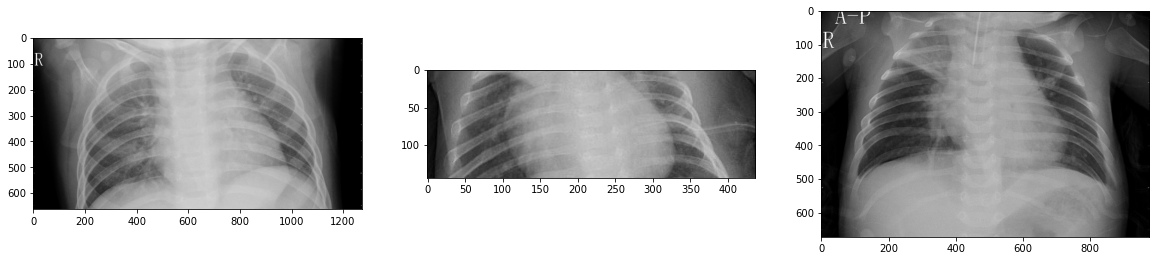

In [7]:
#pacientes con neumonia
afectados=glob("chest_xray/train/PNEUMONIA/**")
def plotThreeProblemImages(images):
    r=random.sample(images,3)
    plt.figure(figsize=(20,20))
    plt.subplot(1,3,1)
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(1,3,2)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(1,3,3)
    plt.imshow(cv2.imread(r[2]))
plotThreeProblemImages(afectados)

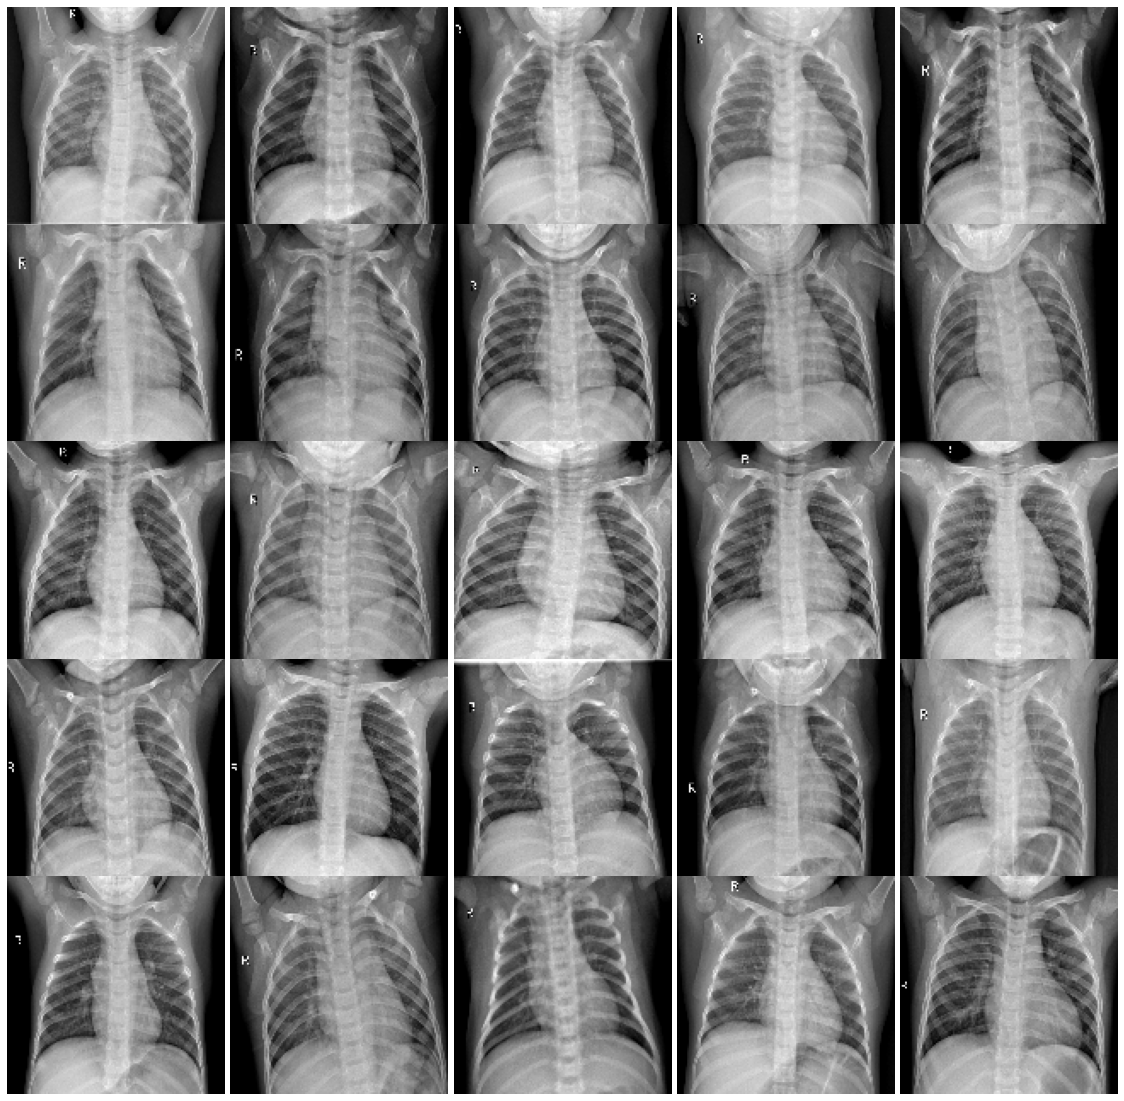

In [8]:
#imprimimos muchas normales
normales=glob("chest_xray/train/NORMAL/**")

plt.rcParams["figure.figsize"]=(20.0,20.0)
plt.subplots_adjust(wspace=0,hspace=0)
def plotSomeNormalImages(images):
    i_=0
    for i in images[:25]:
        foto=cv2.imread(i)
        foto=cv2.resize(foto,(128,128))
        plt.subplot(5,5,i_+1)
        plt.imshow(cv2.cvtColor(foto,cv2.COLOR_BGR2RGB));plt.axis("off")
        i_+=1
plotSomeNormalImages(normales)

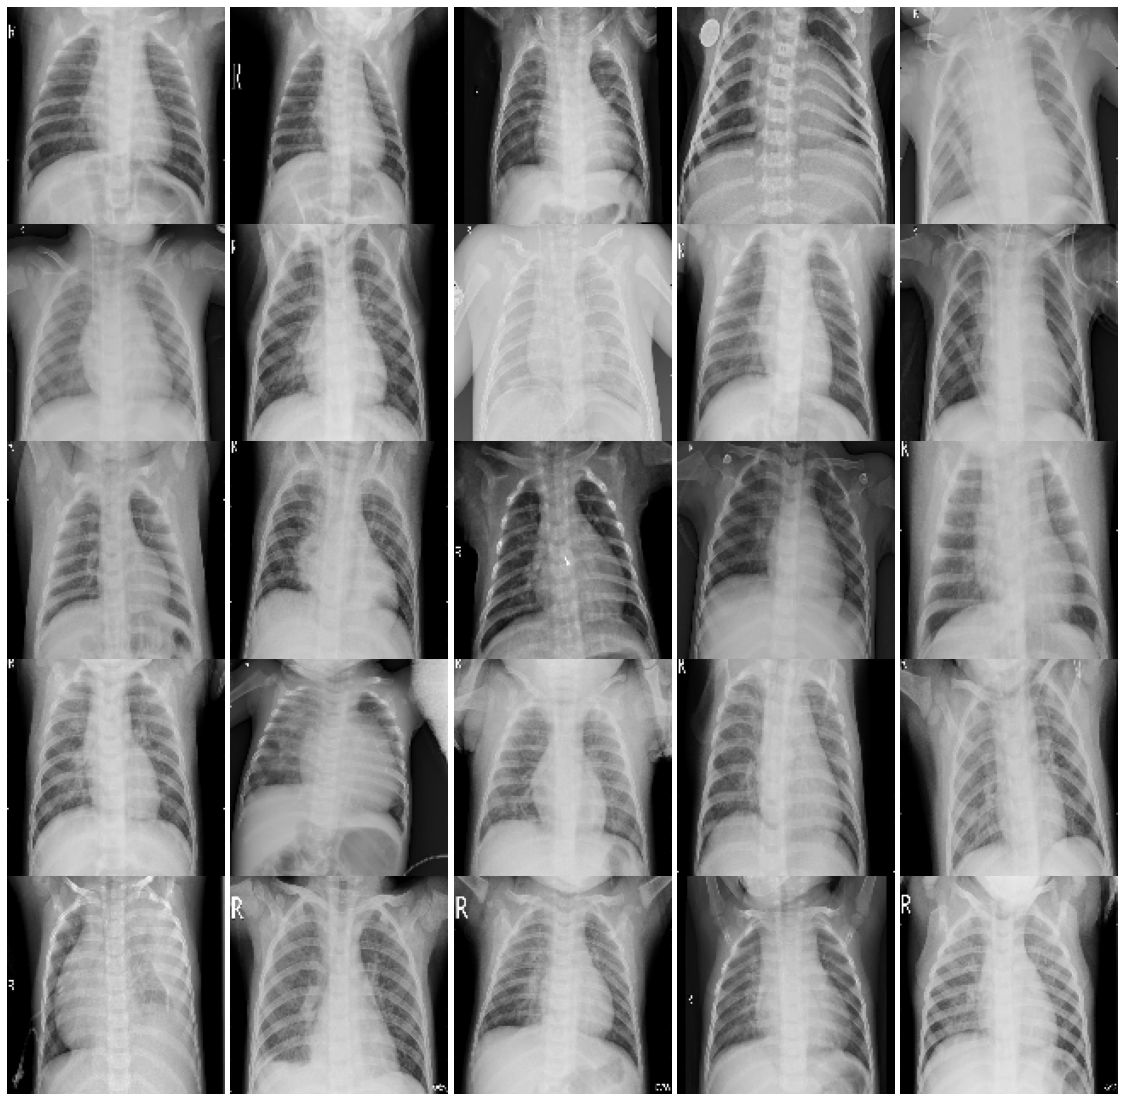

In [9]:
#imprimimos muchas afectados
normales=glob("chest_xray/train/PNEUMONIA//**")

plt.rcParams["figure.figsize"]=(20.0,20.0)
plt.subplots_adjust(wspace=0,hspace=0)
def plotSomeNormalImages(images):
    i_=0
    for i in images[:25]:
        foto=cv2.imread(i)
        foto=cv2.resize(foto,(128,128))
        plt.subplot(5,5,i_+1)
        plt.imshow(cv2.cvtColor(foto,cv2.COLOR_BGR2RGB));plt.axis("off")
        i_+=1
plotSomeNormalImages(normales)

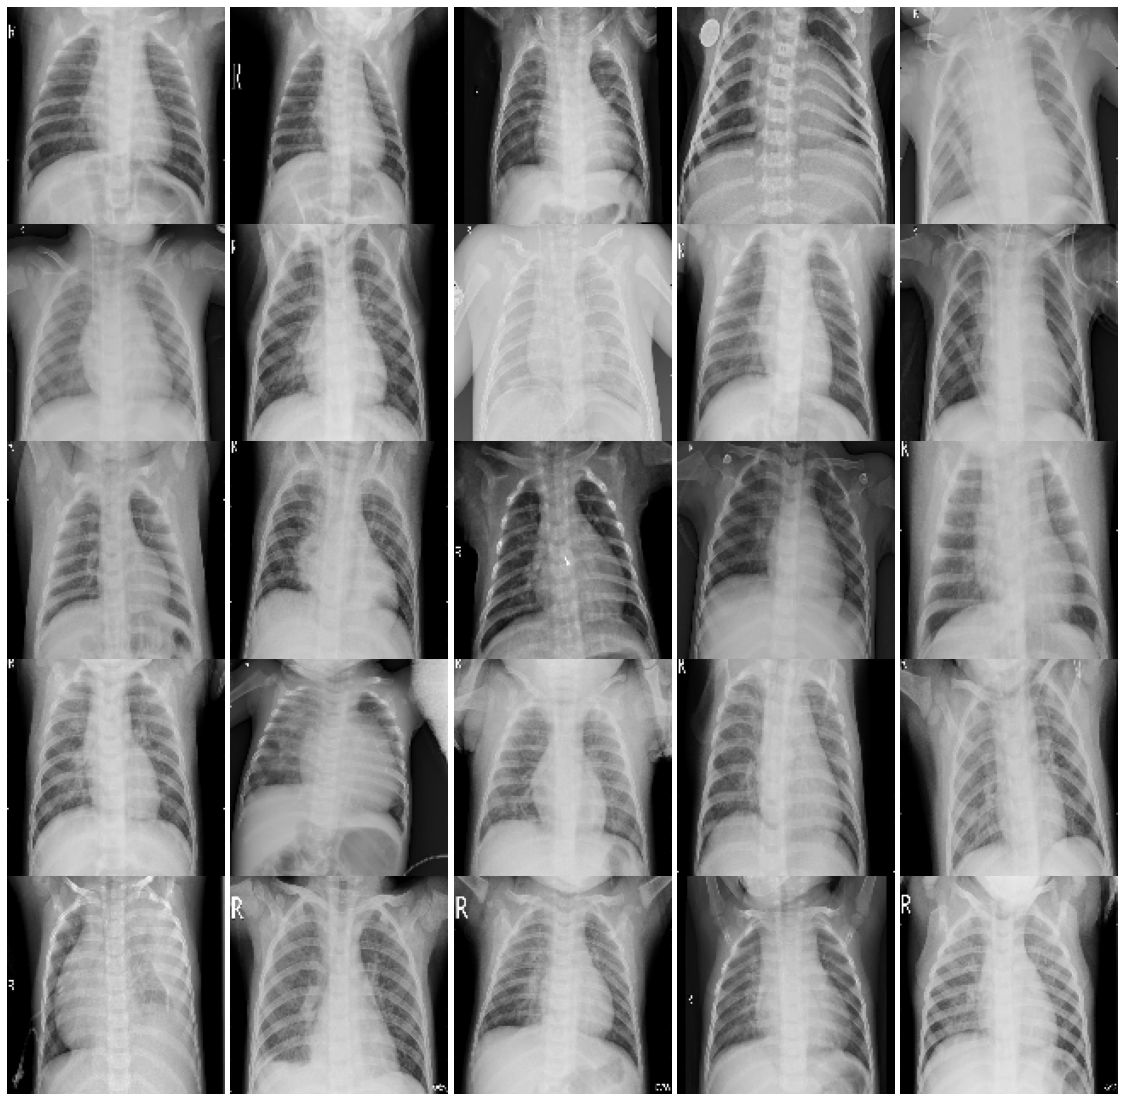

In [10]:

#imprimimos muchas
afectados=glob("chest_xray/train/PNEUMONIA/**")
plt.rcParams["figure.figsize"]=(20.0,20.0)
plt.subplots_adjust(wspace=0,hspace=0)
def plotSomeProblemImages(images):
    i_=0
    for i in images[:25]:
        foto=cv2.imread(i)
        foto=cv2.resize(foto,(128,128))
        plt.subplot(5,5,i_+1)
        plt.imshow(cv2.cvtColor(foto,cv2.COLOR_BGR2RGB));plt.axis("off")
        i_+=1
plotSomeProblemImages(afectados)

#### UTILIZAMOS SEABORN PARA CONFIRMAR BALANCEO

{0: 'NORMALES', 1: 'NEUMONIA'}


C:\Users\MILTON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


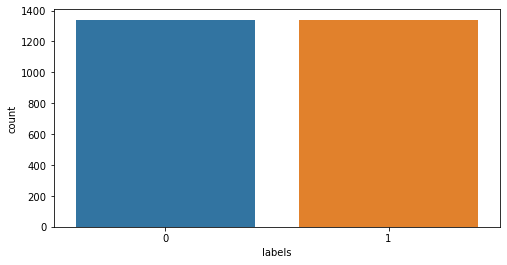

In [11]:
import seaborn as sns
plt.figure(figsize=(8,4))
map_characters={0:"NORMALES",1:"NEUMONIA"}
dict_characters=map_characters
df=pd.DataFrame()
df["labels"]=y_train
lab=df["labels"]
dist=lab.value_counts()
sns.countplot(lab)
print(dict_characters)

In [12]:
x_train.shape
# (cantidad_imagenes,ancho,alto)

(2682, 150, 150)

### tenemos que darle una dimension de color

In [13]:
# (cantidad_imagenes,ancho,alto,color)
x_train_reshaped=x_train.reshape(len(x_train),150,150,1)
x_test_reshaped=x_test.reshape(len(x_test),150,150,1)

In [14]:
x_train_reshaped.shape

(2682, 150, 150, 1)

In [15]:
x_test_reshaped.shape

(624, 150, 150, 1)

### procedemos a realizar el modelo

In [16]:
#declaramos el modelo
model=models.Sequential()
#agregamos una capa incovando redes neuronales convolucionales
model.add(layers.Conv2D(64,(3,3),activation="relu",input_shape=(150,150,1)))
model.add(layers.MaxPooling2D((2,2)))
#capa 2 oculta
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
#capa 3 oculta
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
#capa con la que aplanamos los valores
model.add(layers.Conv2D(64,(3,3),activation="relu"))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))

#capa de salida
model.add(layers.Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

### compilamos el modelo

In [17]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir,histogram_freq=1)
model.fit(x_train_reshaped,
         y_train,
         epochs=10,
         validation_data=(x_test_reshaped,y_test),
         callbacks=[tensorboard_callback])

Epoch 1/10
84/84 [==============================] - 177s 2s/step - loss: 0.6209 - accuracy: 0.6067 - val_loss: 0.4575 - val_accuracy: 0.8045
Epoch 2/10
84/84 [==============================] - 165s 2s/step - loss: 0.1993 - accuracy: 0.9207 - val_loss: 0.6851 - val_accuracy: 0.7660
Epoch 3/10
84/84 [==============================] - 167s 2s/step - loss: 0.1301 - accuracy: 0.9505 - val_loss: 0.4197 - val_accuracy: 0.8333
Epoch 4/10
84/84 [==============================] - 173s 2s/step - loss: 0.0968 - accuracy: 0.9654 - val_loss: 0.8593 - val_accuracy: 0.7772
Epoch 5/10
84/84 [==============================] - 162s 2s/step - loss: 0.0843 - accuracy: 0.9642 - val_loss: 1.0310 - val_accuracy: 0.7564
Epoch 6/10
84/84 [==============================] - 175s 2s/step - loss: 0.0624 - accuracy: 0.9739 - val_loss: 0.6350 - val_accuracy: 0.8269
Epoch 7/10
84/84 [==============================] - 204s 2s/step - loss: 0.0513 - accuracy: 0.9794 - val_loss: 0.6671 - val_accuracy: 0.8349
Epoch 8/10
84

In [18]:
test_loss,test_acc=model.evaluate(x_test_reshaped,y_test)
print(test_acc)

20/20 [==============================] - 11s 577ms/step - loss: 0.5718 - accuracy: 0.8317
0.8317307829856873


In [19]:
train_loss,train_acc=model.evaluate(x_train_reshaped,y_train)

84/84 [==============================] - 37s 435ms/step - loss: 0.0466 - accuracy: 0.9799


In [20]:
print(train_acc)

0.9798657894134521


In [21]:
predictions=model.predict(x_test_reshaped)

In [22]:
predictions[0]

array([0.9823125 , 0.01768743], dtype=float32)

In [23]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

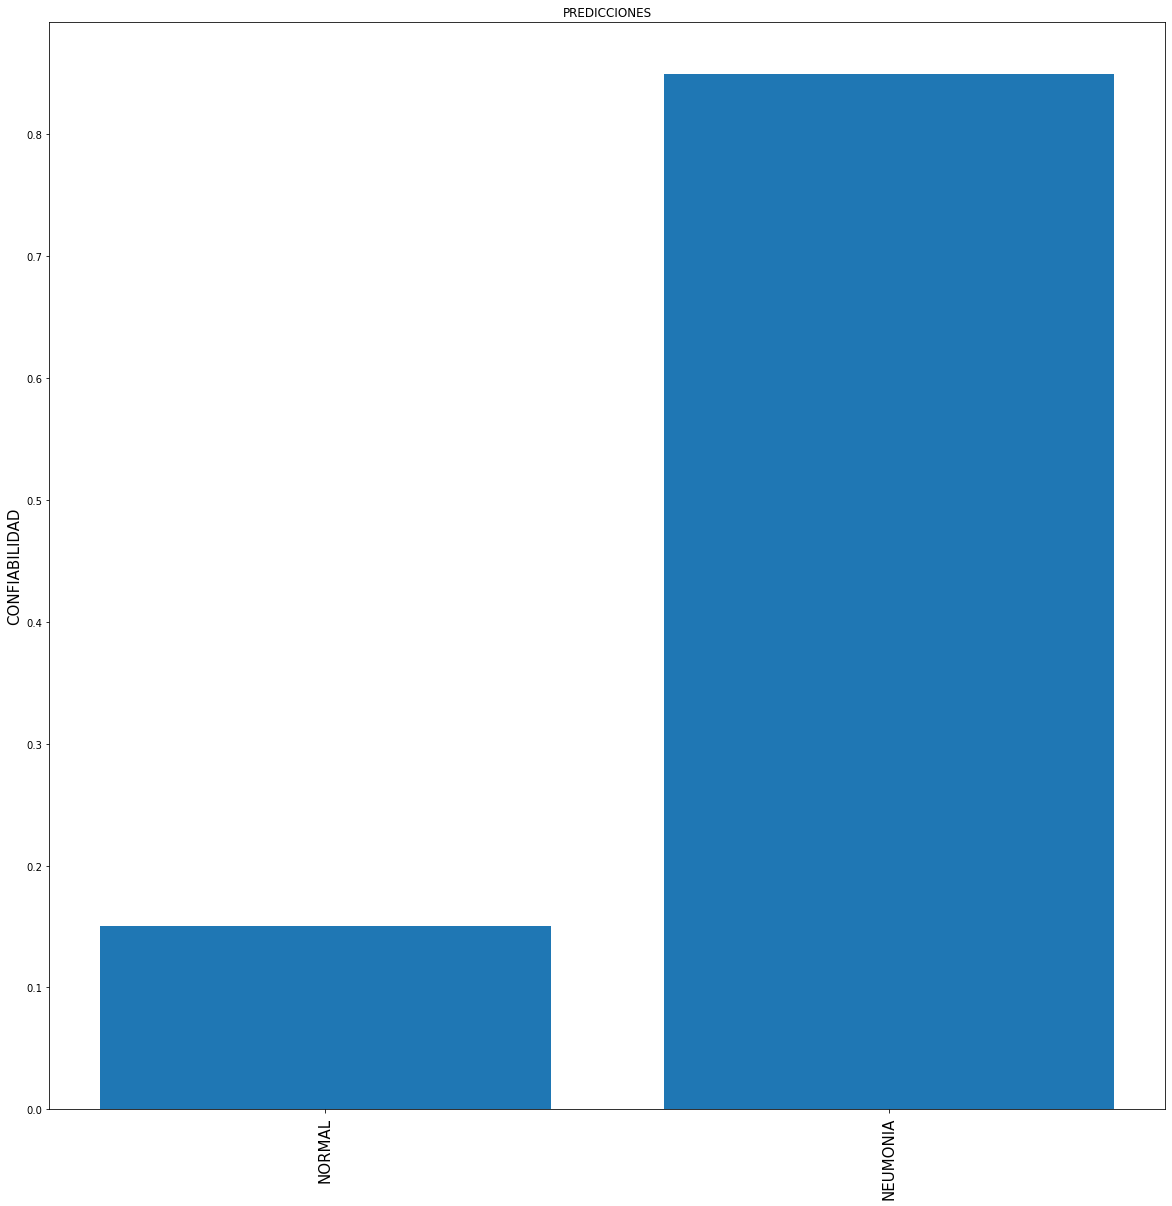

In [24]:
class_names=['NORMAL','NEUMONIA']
index=np.arange(len(class_names))
plt.bar(index,predictions[139])
plt.ylabel("CONFIABILIDAD",fontsize=15)
plt.xticks(index,class_names,fontsize=15,rotation=90)
plt.title("PREDICCIONES")
plt.show()

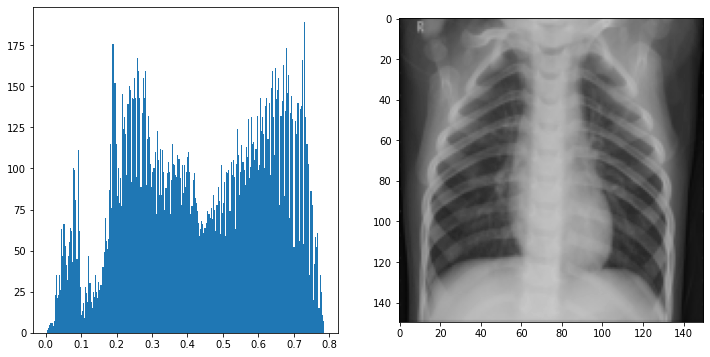

In [25]:
plotHistogram(x_test[139])